# 使用GA求最大值来练习面向对象编程

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
class GA(object):
    
    # Generate the population
    def __generate_pop(self):
        
        self.pop = np.random.randint(low=0, high=2, size=(pop_size, chrom_length))
    
    
    
    # Transfer the chrom to the wanted boundary
    def __transfer2decimal(self):
        
        # Transfer to decimal then normalized to [0,1]
        tmp_decimal = self.pop.dot(2 ** np.arange(chrom_length)[::-1]) / float(2**chrom_length - 1)
        
        # Normalized to the needed range
        length = x_bound[1] - x_bound[0]
        self.decimal = tmp_decimal * length + x_bound[0]
    
    
    
    # The target function
    def __F(self): 
    
        self.target = np.sin(10*self.decimal)*self.decimal + np.cos(2*self.decimal)*self.decimal     

    
    
    # Fitness_score
    def __fitness_score(self):
        
        # 1e-3 to make the min point have the chance to be selected
        self.score = self.target + 1e-3 - np.min(self.target)
    
    
    
    # Selection
    def __selection(self):
        
        # Select all points by fitness and return the index
        idx = np.random.choice(np.arange(pop_size), size=pop_size, replace=True,
                           p=self.score/self.score.sum())
        
        # Get the selected population
        self.pop = self.pop[idx].copy()
        
    
    
    # Crossover
    def __crossover(self):
        
        pop_crossed = list()
        
        for parent in self.pop:
            if np.random.rand() < cross_rate:
                
                # Randomly choose the crossover points
                cross_points = np.random.randint(0, 2, chrom_length).astype(np.bool)
                
                # Randomly choose one DNA from population as mate
                mate = self.pop[int(np.random.randint(0, pop_size, size=1))].copy()
                
                # Crossover
                parent[cross_points] = mate[cross_points]
                pop_crossed.append(list(parent))
            
            else:
                pop_crossed.append(list(parent))
        
        self.pop = np.array(pop_crossed)
        
    
    
    # Mutation
    def __mutation(self):
        
        chrom_tmp = list()
        pop_mutated = list()
        
        for child in self.pop:
            for child_chrom in child:
                if np.random.rand() < mutation_rate:
                    if child_chrom == 1:
                        child_chrom = 0
                    else:
                        child_chrom = 1
                    chrom_tmp.append(child_chrom)
                else:
                    chrom_tmp.append(child_chrom)
            pop_mutated.append(chrom_tmp)
            chrom_tmp = list()
        
        self.pop = np.array(pop_mutated)
    
    
    
    # Start
    def start(self):
        
        # Initialize
        self.__generate_pop()
        self.__transfer2decimal()
        self.__F()
        self.__fitness_score()
        
        mean_score = list()
        mean_score.append(np.mean(self.score))
        
        
        # Process
        for i in range(n_generations):
            self.__selection()
            self.__crossover()
            self.__mutation()
            self.__transfer2decimal()
            self.__F()
            self.__fitness_score()
            mean_score.append(np.mean(self.score))
        
        return np.array(mean_score)

In [69]:
chrom_length = 10            # DNA length
pop_size = 100               # population size
cross_rate = 0.8             # mating probability (DNA crossover)
mutation_rate = 0.003        # mutation probability
n_generations = 100
x_bound = [-50, 50]          # x upper and lower bounds

In [70]:
a = GA()

In [71]:
s = a.start()

In [72]:
s

array([7.46213204e+01, 7.33333080e+01, 9.38971743e+01, 7.64891932e+01,
       6.27973542e+01, 6.06028012e+01, 7.40899445e+01, 8.12187701e+01,
       8.11981002e+01, 6.99462618e+01, 7.83909803e+01, 6.46627217e+01,
       8.46400187e+01, 9.54946465e+01, 9.97223046e+01, 7.81673198e+01,
       7.95195674e+01, 8.27818536e+01, 1.08796665e+02, 7.74275245e+01,
       1.34025451e+02, 5.98470247e+01, 7.18321999e+01, 1.45674986e+02,
       8.83460502e+01, 8.17181489e+01, 1.02368143e+02, 1.66655058e+02,
       8.53720485e+01, 7.93367734e+01, 1.66581643e+02, 1.00308476e+02,
       9.42058346e+01, 9.95019659e+01, 9.37059893e+01, 9.61231066e+01,
       1.60680974e+01, 6.07090819e+01, 1.05939118e+02, 2.36539628e+01,
       1.18082692e+01, 9.06815531e+01, 3.32206210e+01, 9.18111445e+01,
       1.81882577e+02, 1.01144088e+02, 9.12105046e+01, 2.52263984e+01,
       9.20031133e+01, 1.05967325e+02, 1.81523951e+02, 1.80614541e+02,
       4.55117617e+01, 2.47875886e+01, 9.30871374e+01, 1.22196255e+01,
      

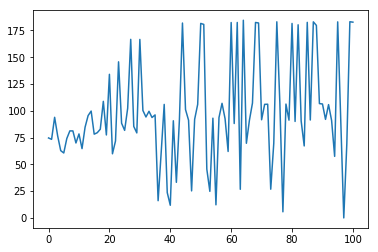

In [73]:
plt.plot(s)